In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run this command to allow more data to be displayed than default
pd.set_option('display.max_rows', 200)

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the cleaned csv
cleaned = pd.read_csv('Data/cleaned_transport.csv')
cleaned

,MSOA,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,motorcycle_perc,bicycle_perc,on_foot_perc,other_perc,car_perc
0,E02000001,14.649948,18.390805,5.433647,5.538140,0.459770,5.078370,45.642633,0.856844,3.051202
1,E02000002,6.400966,15.660225,8.212560,14.734300,0.885668,1.328502,4.669887,0.483092,46.819646
2,E02000003,6.895792,12.778145,19.850187,10.619079,0.682970,0.881251,5.904384,0.462657,41.440846
3,E02000004,6.368090,10.146956,13.750875,9.972008,1.084675,1.329601,6.752974,0.454864,49.475157
4,E02000005,6.286509,12.406120,12.294854,15.076495,0.917942,1.585535,5.535466,0.166898,45.201669
...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,8.073744,0.021191,1.292647,3.390549,0.720492,2.564103,9.557110,0.360246,72.981564
7197,W02000420,13.338290,0.148699,0.832714,3.568773,0.475836,1.501859,4.014870,0.550186,75.375465
7198,W02000421,24.655573,0.107354,0.339953,1.789229,0.572553,0.984076,4.007873,0.429415,66.935051
7199,W02000422,6.057363,0.064212,4.965753,8.005137,0.214041,3.381849,18.857021,0.470890,57.448630


In [3]:
# replace all NA values with 0
cleaned.fillna(0, inplace=True)

In [4]:
# keep only numeric columns (remove MSOA column)
numeric_cleaned = cleaned.select_dtypes('number')
numeric_cleaned

,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,motorcycle_perc,bicycle_perc,on_foot_perc,other_perc,car_perc
0,14.649948,18.390805,5.433647,5.538140,0.459770,5.078370,45.642633,0.856844,3.051202
1,6.400966,15.660225,8.212560,14.734300,0.885668,1.328502,4.669887,0.483092,46.819646
2,6.895792,12.778145,19.850187,10.619079,0.682970,0.881251,5.904384,0.462657,41.440846
3,6.368090,10.146956,13.750875,9.972008,1.084675,1.329601,6.752974,0.454864,49.475157
4,6.286509,12.406120,12.294854,15.076495,0.917942,1.585535,5.535466,0.166898,45.201669
...,...,...,...,...,...,...,...,...,...
7196,8.073744,0.021191,1.292647,3.390549,0.720492,2.564103,9.557110,0.360246,72.981564
7197,13.338290,0.148699,0.832714,3.568773,0.475836,1.501859,4.014870,0.550186,75.375465
7198,24.655573,0.107354,0.339953,1.789229,0.572553,0.984076,4.007873,0.429415,66.935051
7199,6.057363,0.064212,4.965753,8.005137,0.214041,3.381849,18.857021,0.470890,57.448630


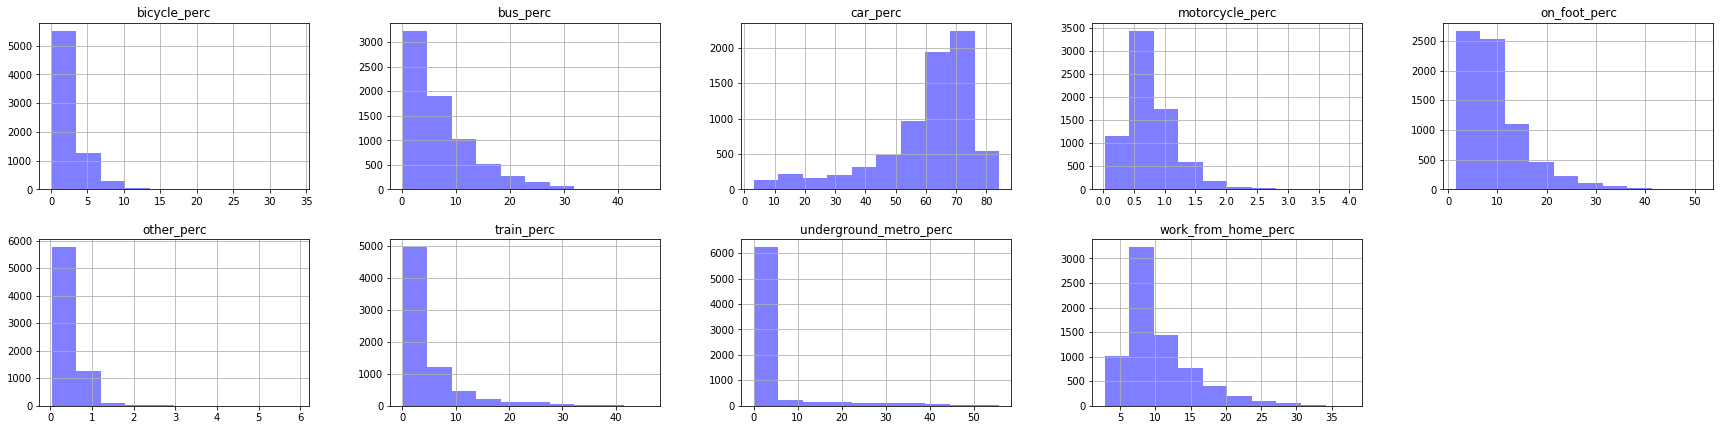

In [5]:
#plot the numeric columns
numeric_cleaned.hist(layout=(4, 5), figsize=(30, 15), color='blue', alpha=.5);

In [6]:
# describe columns
#numeric_cleaned['avg_time_from_origin_bus_UNWEIGHTED'].describe()

The Data is Skewed. We need to transform it. Here we will do a BoxCox Transformation

In [7]:
from sklearn import preprocessing

In [8]:
# get the columns - to paste into next cell
numeric_cleaned.columns

Index(['work_from_home_perc', 'underground_metro_perc', 'train_perc',
       'bus_perc', 'motorcycle_perc', 'bicycle_perc', 'on_foot_perc',
       'other_perc', 'car_perc'],
      dtype='object')

In [9]:
# ERROR WITH TRANSFORMATION (https://github.com/scikit-learn/scikit-learn/issues/14959)

#pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
#cols=['avg_time_from_origin_car_UNWEIGHTED', 'avg_time_from_origin_bus_UNWEIGHTED',
#      'avg_time_from_origin_rail_UNWEIGHTED']


# transform the columns
#mat = pt.fit_transform(numeric_cleaned[cols])
# show the first five rows of the array
#mat[:5]

BoxCox can only support positive numbers but yeo-johnson supports 0 and negative values. We have a lot of ) values
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html

In [10]:
# # pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # support only positive value
# pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
# cols=['Bus_stops', 'Train_stations', 'metro_stations', 'HH_owning_cars_perc',
#        'work_from_home_perc', 'underground_metro_perc', 'train_perc',
#        'bus_perc', 'taxi_perc', 'motorcycle_perc', 'bicycle_perc',
#        'on_foot_perc', 'other_perc', 'avg_time_from_origin_car_UNWEIGHTED',
#        'avg_time_car', 'avg_time_from_origin_bus_UNWEIGHTED', 'avg_time_bus',
#        'avg_time_from_origin_rail_UNWEIGHTED', 'avg_time_rail', 'car_perc']


# # transform the columns
# mat = pt.fit_transform(numeric_cleaned[cols])
# # show the first five rows of the array
# mat[:5]

## In Case using a subset of variables: (if not then run above cell instead)

In [11]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
cols = ['work_from_home_perc', 'underground_metro_perc', 'train_perc',
       'bus_perc', 'motorcycle_perc', 'bicycle_perc',
       'on_foot_perc', 'other_perc', 'car_perc']


# transform the columns
mat = pt.fit_transform(numeric_cleaned[cols])
# show the first five rows of the array
mat[:5]

array([[1.21339329e+00, 6.43443369e-01, 1.28510096e+00, 1.76540729e+00,
        3.15371007e-01, 1.08296334e+00, 2.16889346e+00, 3.20703681e-01,
        1.35296735e+01],
       [1.07179966e+00, 6.41653942e-01, 1.43569119e+00, 2.51858208e+00,
        4.70664607e-01, 6.56874415e-01, 1.31832062e+00, 2.53959801e-01,
        7.57701299e+03],
       [1.08720025e+00, 6.38737836e-01, 1.70344859e+00, 2.26349381e+00,
        4.06521911e-01, 5.22238225e-01, 1.42537951e+00, 2.48526470e-01,
        5.58776201e+03],
       [1.07071415e+00, 6.34302491e-01, 1.60125528e+00, 2.21470513e+00,
        5.21544224e-01, 6.57152781e-01, 1.48517799e+00, 2.46385124e-01,
        8.69762073e+03],
       [1.06798452e+00, 6.38242890e-01, 1.56750518e+00, 2.53648939e+00,
        4.79630489e-01, 7.16694506e-01, 1.39623710e+00, 1.28787433e-01,
        6.93979209e+03]])

In [12]:
# create column names to append to these transformed columns
yj_cols = [f'yj_{c}' for c in cols]   # yj for yeo-johnson
yj_cols

['yj_work_from_home_perc',
 'yj_underground_metro_perc',
 'yj_train_perc',
 'yj_bus_perc',
 'yj_motorcycle_perc',
 'yj_bicycle_perc',
 'yj_on_foot_perc',
 'yj_other_perc',
 'yj_car_perc']

In [13]:
# convert np array to df
yj_transformed = pd.DataFrame(mat, columns=yj_cols)
yj_transformed.head()

,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,1.213393,0.643443,1.285101,1.765407,0.315371,1.082963,2.168893,0.320704,13.529673
1,1.071800,0.641654,1.435691,2.518582,0.470665,0.656874,1.318321,0.253960,7577.012991
2,1.087200,0.638738,1.703449,2.263494,0.406522,0.522238,1.425380,0.248526,5587.762008
3,1.070714,0.634302,1.601255,2.214705,0.521544,0.657153,1.485178,0.246385,8697.620729
4,1.067985,0.638243,1.567505,2.536489,0.479630,0.716695,1.396237,0.128787,6939.792089


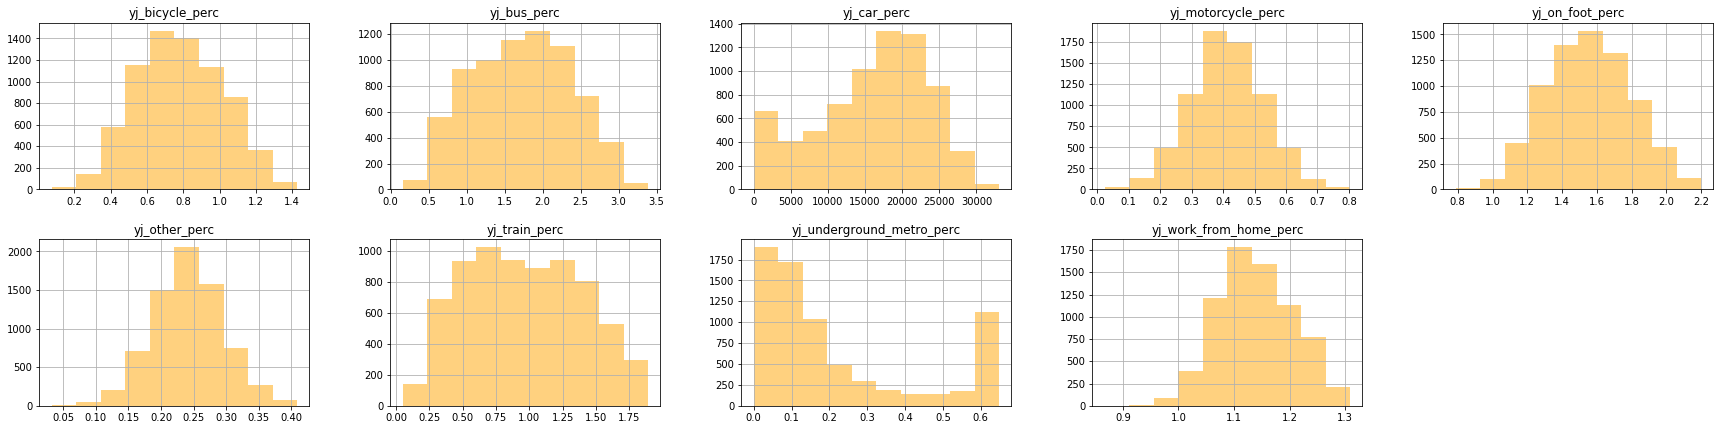

In [14]:
# plot
yj_transformed.hist(layout=(4, 5), figsize=(30, 15), color='orange', alpha=.5);

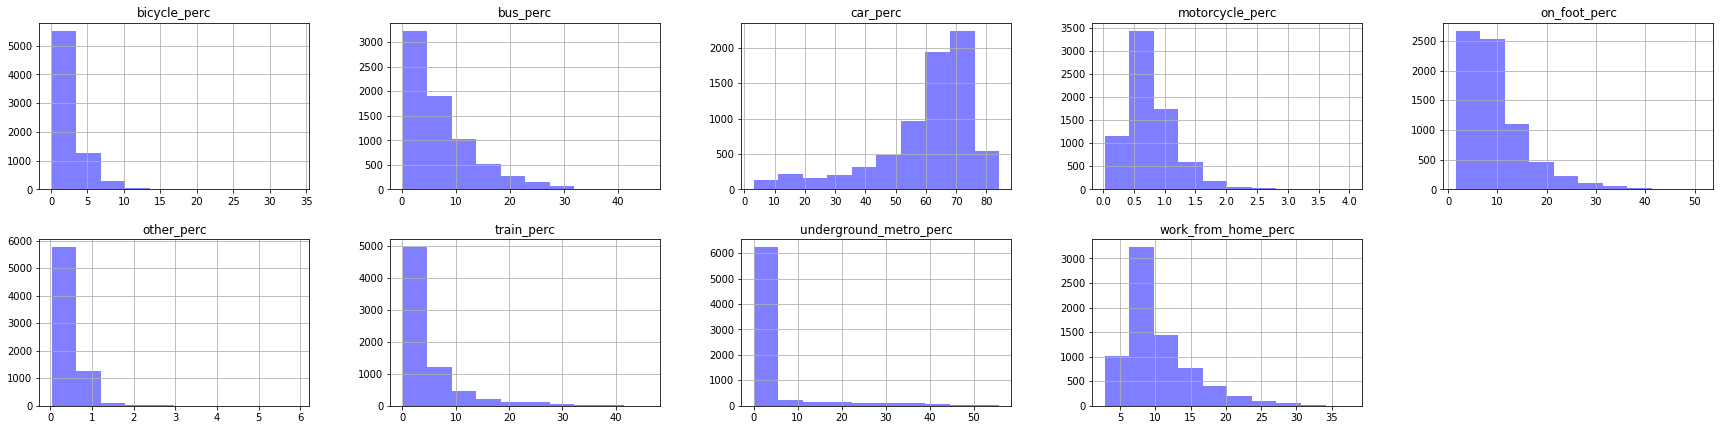

In [15]:
# compare to original 
numeric_cleaned.hist(layout=(4, 5), figsize=(30, 15), color='blue', alpha=.5);

## Standardize

All variables need to be standardized. if they have different ranges then the ones with the larger ranges will dominate in the clustering

1. Range Standardization (https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame)

In [16]:
#transform df to np array
x = yj_transformed.values 
# this is range standardization
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# transform to dataframe
range_standardized = pd.DataFrame(x_scaled, columns=yj_cols)
range_standardized

,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,0.783250,0.991524,0.670468,0.497181,0.373796,0.745066,0.977752,0.765266,0.000000
1,0.462820,0.988767,0.752257,0.730330,0.572799,0.429879,0.375330,0.588180,0.228913
2,0.497672,0.984273,0.897682,0.651366,0.490602,0.330285,0.451155,0.573764,0.168707
3,0.460364,0.977438,0.842178,0.636263,0.637999,0.430084,0.493507,0.568083,0.262828
4,0.454186,0.983510,0.823848,0.735873,0.584288,0.474129,0.430515,0.256070,0.209627
...,...,...,...,...,...,...,...,...,...
7196,0.567380,0.031798,0.352079,0.386904,0.507273,0.593087,0.598651,0.489915,0.698007
7197,0.753930,0.192388,0.262482,0.398055,0.383379,0.460536,0.325501,0.631048,0.757139
7198,0.918745,0.145435,0.121925,0.257658,0.436947,0.356388,0.324922,0.548785,0.561430
7199,0.436186,0.091456,0.651616,0.583752,0.195743,0.657960,0.782914,0.579655,0.382336


In [17]:
# Add the MSOA name column

# extract MSOA codes from initial 'cleaned' dataframe
MSOA_name = cleaned[['MSOA']]
MSOA_name

# concatenate/merge
range_st =pd.concat([MSOA_name, range_standardized], axis='columns')
range_st.head()

,MSOA,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,E02000001,0.783250,0.991524,0.670468,0.497181,0.373796,0.745066,0.977752,0.765266,0.000000
1,E02000002,0.462820,0.988767,0.752257,0.730330,0.572799,0.429879,0.375330,0.588180,0.228913
2,E02000003,0.497672,0.984273,0.897682,0.651366,0.490602,0.330285,0.451155,0.573764,0.168707
3,E02000004,0.460364,0.977438,0.842178,0.636263,0.637999,0.430084,0.493507,0.568083,0.262828
4,E02000005,0.454186,0.983510,0.823848,0.735873,0.584288,0.474129,0.430515,0.256070,0.209627


In [18]:
#save to csv
range_st.to_csv('Data/yeojohnson_range_st.csv')

2. Z-score standardization (https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns)

In [19]:
from scipy.stats import zscore
zscore = yj_transformed.apply(zscore)
zscore

,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,1.094545,1.965725,0.756826,0.058967,-0.839575,1.275285,2.541451,1.459227,-2.112126
1,-1.009040,1.957405,1.108707,1.222531,0.498862,-0.534930,-0.984309,0.228226,-1.111678
2,-0.780242,1.943847,1.734370,0.828451,-0.053968,-1.106924,-0.540533,0.128016,-1.374803
3,-1.025167,1.923226,1.495577,0.753078,0.937380,-0.533747,-0.292659,0.088521,-0.963451
4,-1.065720,1.941546,1.416714,1.250196,0.576136,-0.280787,-0.661333,-2.080410,-1.195965
...,...,...,...,...,...,...,...,...,...
7196,-0.322619,-0.929960,-0.612976,-0.491386,0.058155,0.402422,0.322708,-0.454857,0.938470
7197,0.902061,-0.445428,-0.998451,-0.435735,-0.775119,-0.358857,-1.275943,0.526216,1.196903
7198,1.984056,-0.587092,-1.603167,-1.136411,-0.414835,-0.957006,-1.279329,-0.045623,0.341567
7199,-1.183888,-0.749961,0.675719,0.491015,-2.037105,0.775006,1.401139,0.168965,-0.441150


In [20]:
# concatenate/merge MSOA 
zscore_st = pd.concat([MSOA_name, zscore], axis='columns')
zscore_st.head()

,MSOA,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,E02000001,1.094545,1.965725,0.756826,0.058967,-0.839575,1.275285,2.541451,1.459227,-2.112126
1,E02000002,-1.009040,1.957405,1.108707,1.222531,0.498862,-0.534930,-0.984309,0.228226,-1.111678
2,E02000003,-0.780242,1.943847,1.734370,0.828451,-0.053968,-1.106924,-0.540533,0.128016,-1.374803
3,E02000004,-1.025167,1.923226,1.495577,0.753078,0.937380,-0.533747,-0.292659,0.088521,-0.963451
4,E02000005,-1.065720,1.941546,1.416714,1.250196,0.576136,-0.280787,-0.661333,-2.080410,-1.195965


In [21]:
#save to csv
zscore_st.to_csv('Data/yeojohnson_zscore_st.csv')

3. Interdecile Range Standardization

We subtract the median then divided by the distance between the 90th percentile, and the 10th percentile.

"Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results."

In [22]:
from sklearn.preprocessing import RobustScaler

# we change the range because the default is iqr (0.25 - 0.75)
idr = RobustScaler(quantile_range = (0.1,0.9))

# Transform the 'yj_transformed' df
idr_mat = idr.fit_transform(yj_transformed.values)
idr_mat

array([[ 1.96394611e+00,  5.14207768e-01,  3.53559535e+00, ...,
         4.45444469e+00,  1.51712983e+00, -2.04188301e+02],
       [-1.61735102e+00,  5.12418341e-01,  5.08556946e+00, ...,
        -1.70693245e+00,  2.37798754e-01, -1.14929407e+02],
       [-1.22782728e+00,  5.09502235e-01,  7.84150554e+00, ...,
        -9.31419543e-01,  1.33653941e-01, -1.38405143e+02],
       ...,
       [ 3.47831562e+00, -3.48561625e-02, -6.85976145e+00, ...,
        -2.22248771e+00, -4.68023036e-02,  1.47275385e+01],
       [-1.91502430e+00, -6.98861174e-02,  3.17833324e+00, ...,
         2.46171318e+00,  1.76210984e-01, -5.51056397e+01],
       [-1.79332628e+00,  5.02727497e-02,  3.66084494e+00, ...,
         3.33407575e+00,  1.30336747e+00, -1.17027592e+02]])

In [23]:
# transform to a df
idr_scaled = pd.DataFrame(idr_mat, columns=yj_cols)
idr_scaled

,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,1.963946,0.514208,3.535595,0.156851,-1.111171,2.430043,4.454445,1.517130,-204.188301
1,-1.617351,0.512418,5.085569,5.559558,0.684962,-0.925033,-1.706932,0.237799,-114.929407
2,-1.227827,0.509502,7.841506,3.729747,-0.056916,-1.985175,-0.931420,0.133654,-138.405143
3,-1.644807,0.505067,6.789664,3.379774,1.273438,-0.922841,-0.498251,0.092609,-101.704785
4,-1.713847,0.509007,6.442286,5.688011,0.788661,-0.454003,-1.142521,-2.161476,-122.449438
...,...,...,...,...,...,...,...,...,...
7196,-0.448736,-0.108601,-2.498143,-2.398570,0.093549,0.812267,0.577121,-0.472103,67.982532
7197,1.636247,-0.004387,-4.196091,-2.140170,-1.024674,-0.598697,-2.216571,0.547488,91.039694
7198,3.478316,-0.034856,-6.859761,-5.393578,-0.541187,-1.707315,-2.222488,-0.046802,14.727538
7199,-1.915024,-0.069886,3.178333,2.162951,-2.718213,1.502818,2.461713,0.176211,-55.105640


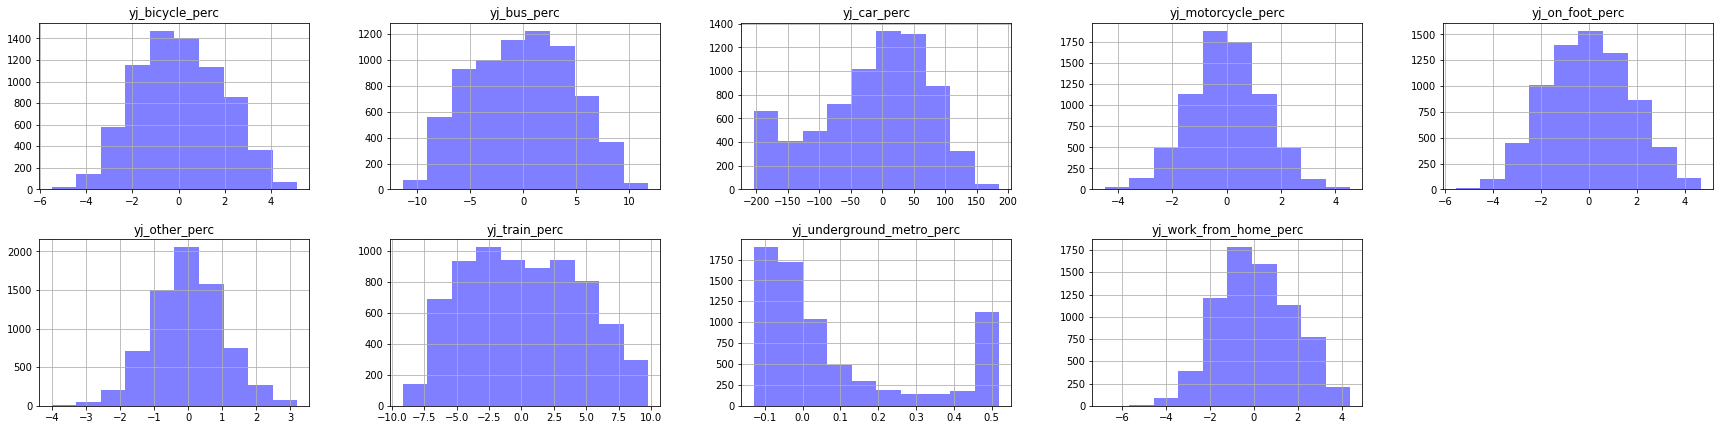

In [24]:
# plot to check the ranges
idr_scaled.hist(layout=(4, 5), figsize=(30, 15), color='blue', alpha=.5);

The ranges are different, so this might not be the best method for scaling

In [25]:
# concatenate/merge MSOA 
idr_st = pd.concat([MSOA_name, idr_scaled], axis='columns')
idr_st.head()

,MSOA,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_motorcycle_perc,yj_bicycle_perc,yj_on_foot_perc,yj_other_perc,yj_car_perc
0,E02000001,1.963946,0.514208,3.535595,0.156851,-1.111171,2.430043,4.454445,1.517130,-204.188301
1,E02000002,-1.617351,0.512418,5.085569,5.559558,0.684962,-0.925033,-1.706932,0.237799,-114.929407
2,E02000003,-1.227827,0.509502,7.841506,3.729747,-0.056916,-1.985175,-0.931420,0.133654,-138.405143
3,E02000004,-1.644807,0.505067,6.789664,3.379774,1.273438,-0.922841,-0.498251,0.092609,-101.704785
4,E02000005,-1.713847,0.509007,6.442286,5.688011,0.788661,-0.454003,-1.142521,-2.161476,-122.449438


In [26]:
#save to csv
idr_st.to_csv('Data/yeojohnson_idr_st.csv')